In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## COVID-19: Spread Over Time

In [2]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt


from pathlib import Path
data_dir = Path('/content/drive/MyDrive/covid_2')

import os
os.listdir(data_dir)

import warnings
warnings.filterwarnings('ignore')

In [3]:
cleaned_data = pd.read_csv(data_dir/'cleaned_data.csv',parse_dates=['Date'])


In [4]:
grouped_us = cleaned_data[cleaned_data['Country/Region'] == "US"].reset_index()
grouped_us_date = grouped_us.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_UK = cleaned_data[cleaned_data['Country/Region'] == "United Kingdom"].reset_index()
grouped_UK_date = grouped_UK.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Brazil = cleaned_data[cleaned_data['Country/Region'] == "Brazil"].reset_index()
grouped_Brazil_date = grouped_Brazil.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Russia = cleaned_data[cleaned_data['Country/Region'] == "Russia"].reset_index()
grouped_Russia_date = grouped_Russia.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_India = cleaned_data[cleaned_data['Country/Region'] == "India"].reset_index()
grouped_India_date = grouped_India.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_rest = cleaned_data[~cleaned_data['Country/Region'].isin(['US', 'United Kingdom', 'Brazil', 'Russia', 'India'])].reset_index()
grouped_rest_date = grouped_rest.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

In [5]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install plotly kaleido IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [8]:
# new data frame with confirmed and deanth 
formated_gdf = cleaned_data.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="Date", 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

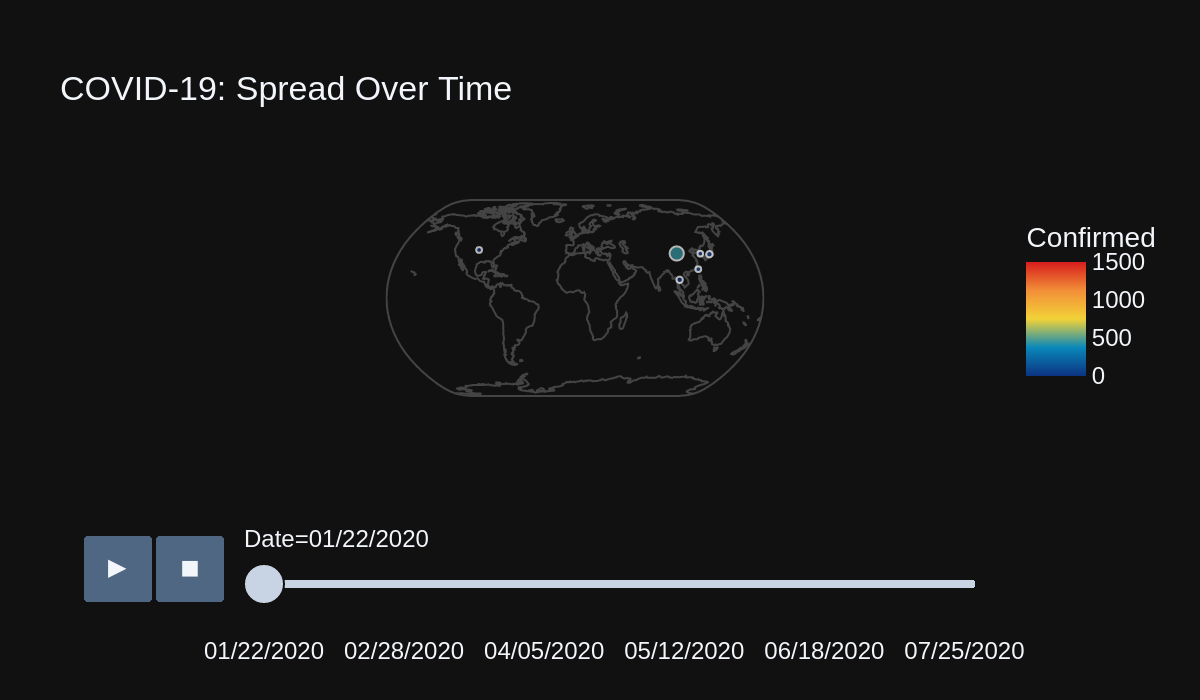

In [9]:
from IPython.display import Image
Image(fig.to_image(format="png", width=600, height=350, scale=2, engine="kaleido"))